In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats



df = pd.read_csv("C:\\Users\\User\\Downloads\\house_price.csv")


# Display first few rows
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

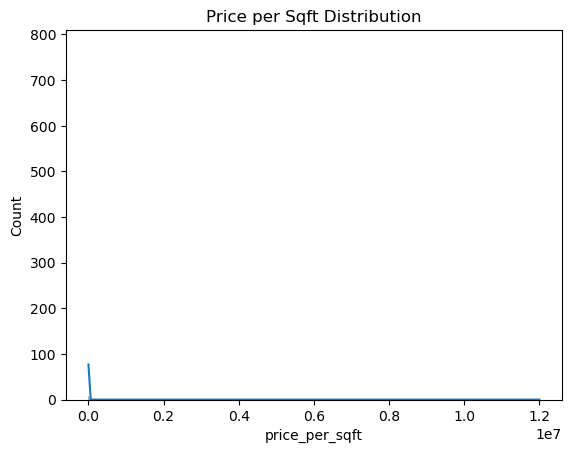

In [6]:
# Basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Check unique values
print(df.nunique())

# Visualize target variable
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Sqft Distribution')
plt.show()


In [7]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
df_mean_trimmed = df[(df['price_per_sqft'] >= mean - 2*std) & (df['price_per_sqft'] <= mean + 2*std)]


In [8]:
low, high = df['price_per_sqft'].quantile([0.05, 0.95])
df_percentile_trimmed = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]


In [9]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
df_iqr_trimmed = df[(df['price_per_sqft'] >= Q1 - 1.5*IQR) & (df['price_per_sqft'] <= Q3 + 1.5*IQR)]


In [14]:
z_scores = np.abs(stats.zscore(df['price_per_sqft']))
df_zscore_trimmed = df[z_scores < 3]


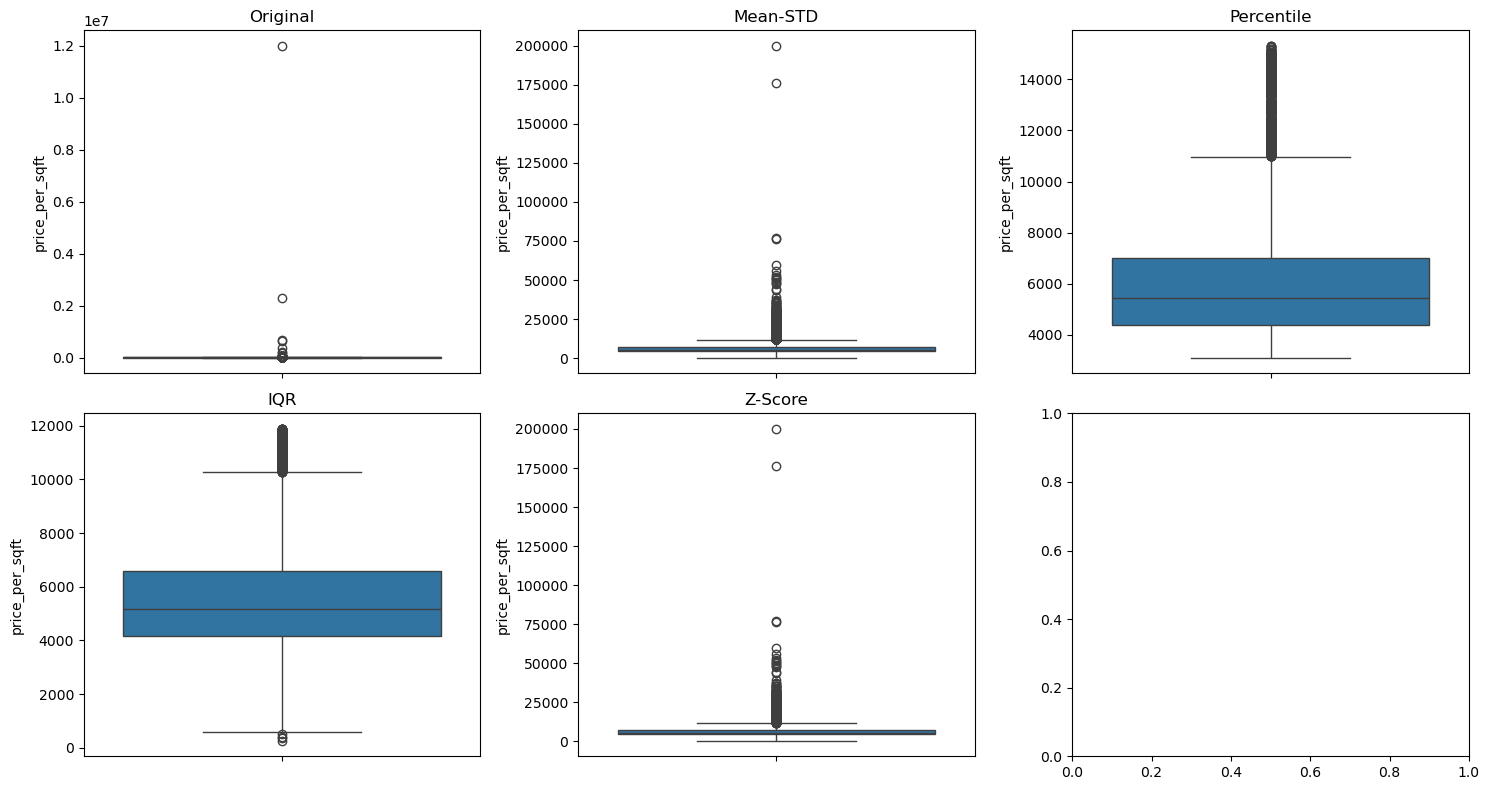

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
sns.boxplot(df['price_per_sqft'], ax=axes[0, 0]).set_title('Original')
sns.boxplot(df_mean_trimmed['price_per_sqft'], ax=axes[0, 1]).set_title('Mean-STD')
sns.boxplot(df_percentile_trimmed['price_per_sqft'], ax=axes[0, 2]).set_title('Percentile')
sns.boxplot(df_iqr_trimmed['price_per_sqft'], ax=axes[1, 0]).set_title('IQR')
sns.boxplot(df_zscore_trimmed['price_per_sqft'], ax=axes[1, 1]).set_title('Z-Score')
plt.tight_layout()
plt.show()


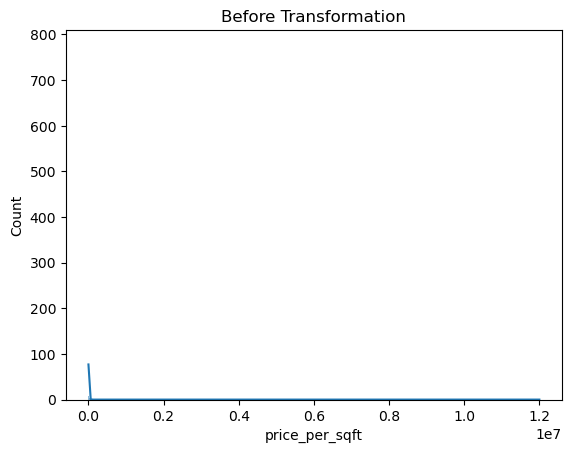

Skewness (Before): 108.28105529705168
Kurtosis (Before): 12095.21502832288


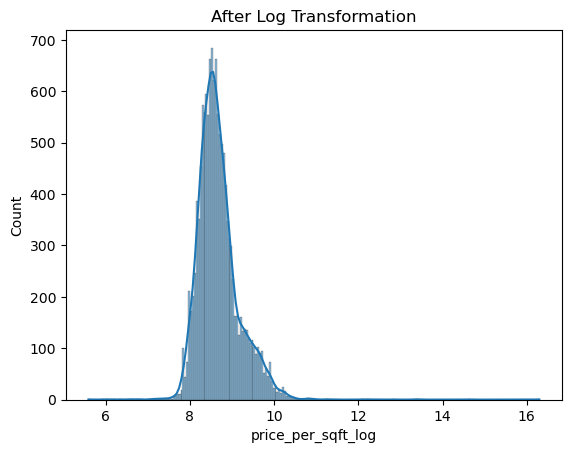

Skewness (After): 1.4004850530059296
Kurtosis (After): 9.206942162860814


In [18]:
# Before transformation
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Before Transformation')
plt.show()

print("Skewness (Before):", df['price_per_sqft'].skew())
print("Kurtosis (Before):", df['price_per_sqft'].kurt())

# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# After transformation
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title('After Log Transformation')
plt.show()

print("Skewness (After):", df['price_per_sqft_log'].skew())
print("Kurtosis (After):", df['price_per_sqft_log'].kurt())


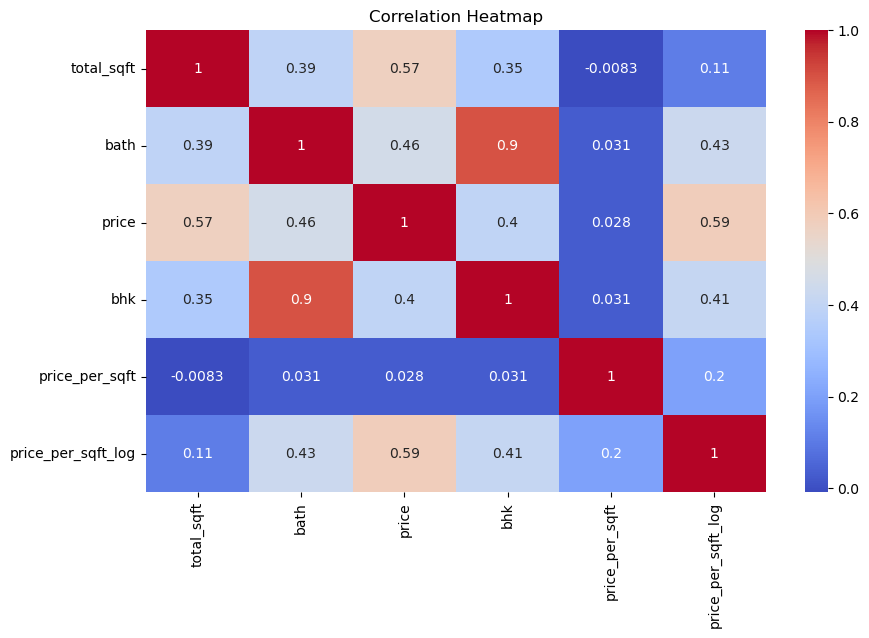

In [26]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


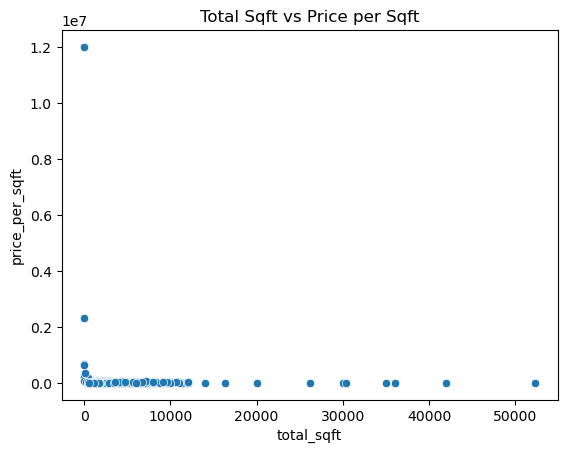

In [27]:
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=df)
plt.title('Total Sqft vs Price per Sqft')
plt.show()
